#### 1.	Data Understanding (5 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category.  (1 MARK)

d.	Generate the covariance and correlation tables for the data (1 MARK)

e.	Create Visualization plots to find the relationship amongst the variables. (1 MARK)



In [1]:
#Load Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Load data set and display first few observations
df = pd.read_csv('sonar.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
#Check data info and dimension
df.info()
#No missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
1        208 non-null float64
2        208 non-null float64
3        208 non-null float64
4        208 non-null float64
5        208 non-null float64
6        208 non-null float64
7        208 non-null float64
8        208 non-null float64
9        208 non-null float64
10       208 non-null float64
11       208 non-null float64
12       208 non-null float64
13       208 non-null float64
14       208 non-null float64
15       208 non-null float64
16       208 non-null float64
17       208 non-null float64
18       208 non-null float64
19       208 non-null float64
20       208 non-null float64
21       208 non-null float64
22       208 non-null float64
23       208 non-null float64
24       208 non-null float64
25       208 non-null float64
26       208 non-null float64
27       208 non-null float64
28       208 non-null float64
29       208 non-null float64
30       208 non-null flo

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df.iloc[:,0:60]
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,8.415814,1
1,13.166842,2
2,16.145169,3
3,15.347698,4
4,14.091123,5
5,22.168634,6
6,28.570843,7
7,23.138437,8
8,41.501098,9
9,46.025418,10


Since VIF is greater than 5 in all the features, it can be concluded that 

In [4]:
#extract the class in Y
Y=df.loc[:,'Class']
# Removing the last column class
df=X=df.iloc[:,0:60]

In [5]:
for col in df.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

In [6]:
#Check the new data dimension
X.shape

(208, 60)

##### 2.	Data Preparation (5 marks)
a.	Scale / Transform/ clean the data so that it is suitable for model building.


In [7]:
# Standardize feature to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
X_std.shape

(208, 60)

##### 3.	Dimensionality Reduction (15 marks)
a.	How will you decide when to apply PCA based on the correlation? (2 marks)

b.	Apply PCA on the above dataset and determine the number of PCA components to be used so that 90% of the variance in data is explained by the same. (7 marks)

c.	Build a data frame with the principal components and check if multi-collinearity still exists. ( 2  marks).

d.	Visualize the spread of data across PCA components. (2 marks)
e.	Check for outliers in the PCA data and treat the same. (2 marks)


In [8]:
# Obtain covariance matrix for X_std
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[1.00483092 0.73184582 0.54505326 ... 0.38848341 0.36492747 0.37180433]
 [0.73184582 1.00483092 0.75555474 ... 0.38797187 0.36742714 0.39373166]
 [0.54505326 0.75555474 1.00483092 ... 0.36863419 0.44492255 0.3906915 ]
 ...
 [0.38848341 0.38797187 0.36863419 ... 1.00483092 0.57568009 0.36082388]
 [0.36492747 0.36742714 0.44492255 ... 0.57568009 1.00483092 0.62841331]
 [0.37180433 0.39373166 0.3906915  ... 0.36082388 0.62841331 1.00483092]]


In [9]:
#Calculate eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 13x13 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 13x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.15285109  0.09718406 -0.01516831 ...  0.05019078  0.01700525
   0.00183178]
 [ 0.16642507  0.10761075 -0.0177492  ... -0.04943593 -0.02652888
   0.00304051]
 [ 0.14010057  0.12665101 -0.0134063  ... -0.01547734  0.09443513
   0.0390152 ]
 ...
 [ 0.14861561  0.08891518  0.03136687 ... -0.01258046  0.00632834
  -0.00795503]
 [ 0.15424107  0.07166207  0.0825588  ... -0.03620538  0.00031458
   0.01245828]
 [ 0.13064442  0.0645332   0.06869771 ...  0.0130131  -0.0137582
  -0.01265418]]

Eigenvalues of Cov(X): 
[1.22830642e+01 1.15740633e+01 5.16594513e+00 3.32726292e+00
 2.96510814e+00 2.37780998e+00 1.97482606e+00 1.71310903e+00
 1.53095513e+00 1.37504023e+00 1.26754198e+00 1.17631412e+00
 9.65826923e-01 9.02162813e-01 8.55544315e-01 8.33722331e-01
 7.49663636e-01 7.40622971e-01 6.57474697e-01 5.95897576e-01
 5.85872143e-01 5.44475864e-01 5.29143291e-01 4.69997902e-01
 4.62154154e-01 4.31034005e-01 3.85681086e-01 3.37232503e-01
 3.16775146e-01 3.10262000e-01 2

In [10]:
# Make pair of eigenvalue, eigenvector
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Do it in descending ordered
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# sorted eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[12.283064224813677, 11.574063269915719, 5.165945132042946, 3.3272629217166405, 2.9651081354794444, 2.3778099758462337, 1.974826061576253, 1.713109029792834, 1.5309551323327972, 1.3750402263182995, 1.2675419820209595, 1.1763141229360403, 0.9658269231986134, 0.9021628129333281, 0.8555443145372889, 0.8337223311387724, 0.7496636364205815, 0.7406229712384647, 0.6574746973495887, 0.595897575972869, 0.5858721431640422, 0.5444758644482395, 0.5291432908501588, 0.46999790241361905, 0.46215415425684914, 0.4310340046943076, 0.38568108622963837, 0.3372325027660784, 0.31677514610702295, 0.3102620004273634, 0.2983883446585965, 0.261641301941671, 0.24885337477183636, 0.2164658215778376, 0.1987048286483202, 0.19058649656010065, 0.1728796792334573, 0.16141890105000184, 0.1377991631123349, 0.13041475105433387, 0.12406892661638386, 0.10420789174063971, 0.08571024778456478, 0.07548500047290224, 0.06382605070908944, 0.05813009984376748, 0.05531055420463275, 0.0433417954914

In [11]:
#Cumulative Variance
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 20.37335172  39.57071628  48.13923104  53.65800848  58.5760965
  62.52006016  65.795613    68.63706788  71.1763925   73.45710826
  75.55952164  77.51061959  79.11259213  80.60896795  82.02801982
  83.41087657  84.65430904  85.88274618  86.97326912  87.96165692
  88.93341601  89.83651299  90.71417855  91.49374238  92.26029614
  92.97523235  93.61494377  94.17429576  94.69971607  95.21433333
  95.70925631  96.14322866  96.55599026  96.91503213  97.24461466
  97.56073169  97.84747923  98.11521731  98.34377842  98.56009135
  98.76587875  98.93872357  99.08088721  99.20609069  99.31195602
  99.40837373  99.5001148   99.57200383  99.63774111  99.6920574
  99.74209958  99.78923201  99.82743804  99.86451685  99.89749681
  99.92568047  99.95053907  99.97036577  99.9893045  100.        ]


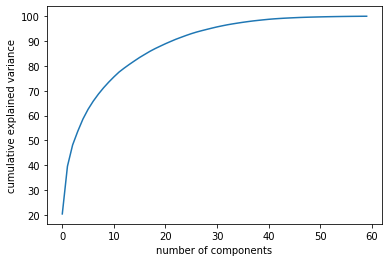

In [12]:
plt.plot(cum_var_exp)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
data_scaled_pca = pd.DataFrame(pca.fit_transform(X_std), columns=X_std.columns)

In [14]:
v = pca.explained_variance_ratio_
vc = v.cumsum()
vc
#pd.DataFrame(list(zip(it.count(), v, vc)), columns=['pc', 'explained', 'cumsum']).head(10)

array([0.20373352, 0.39570716, 0.48139231, 0.53658008, 0.58576096,
       0.6252006 , 0.65795613, 0.68637068, 0.71176392, 0.73457108,
       0.75559522, 0.7751062 , 0.79112592, 0.80608968, 0.8202802 ,
       0.83410877, 0.84654309, 0.85882746, 0.86973269, 0.87961657,
       0.88933416, 0.89836513, 0.90714179, 0.91493742, 0.92260296,
       0.92975232, 0.93614944, 0.94174296, 0.94699716, 0.95214333,
       0.95709256, 0.96143229, 0.9655599 , 0.96915032, 0.97244615,
       0.97560732, 0.97847479, 0.98115217, 0.98343778, 0.98560091,
       0.98765879, 0.98938724, 0.99080887, 0.99206091, 0.99311956,
       0.99408374, 0.99500115, 0.99572004, 0.99637741, 0.99692057,
       0.997421  , 0.99789232, 0.99827438, 0.99864517, 0.99897497,
       0.9992568 , 0.99950539, 0.99970366, 0.99989305, 1.        ])

In [15]:

n_comps = 1 + np.argmax(vc > 0.95)
n_comps

30

In [16]:
# Keep the first 30 principal components 
P_reduce = np.array(eigvectors_sort[0:30]).transpose()
# The projected data in 2D will be n x 7 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [17]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((208, 60), (60, 30), (208, 30))

########################################################################

# Clustering on Dermatology data

### Libraries

In [78]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
sns.set(style='whitegrid')

# 1.Read the dataset (tab, csv, xls, txt, inbuilt dataset)


In [79]:
df=pd.read_csv('dermatology.csv')


In [80]:
df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [81]:
df.columns=[ 'erythema','scaling','definite borders','itching', 'koebner phenomenon','polygonal papules',
           'follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement',
'family history, (0 or 1)','melanin incontinence',
            'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis',
  
'acanthosis',
'hyperkeratosis',
'parakeratosis',
'clubbing of the rete ridges',
'elongation of the rete ridges',
'thinning of the suprapapillary epidermis',
'spongiform pustule',
'munro microabcess',
'focal hypergranulosis',
'disappearance of the granular layer',
'vacuolisation and damage of basal layer',
'spongiosis',
'saw-tooth appearance of retes',
'follicular horn plug',
'perifollicular parakeratosis',
'inflammatory monoluclear inflitrate',
'band-like infiltrate','Age (linear)','class'

]

In [82]:
df.head()



,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


# 2.	Summarize important observations from the data set (5 Marks)
Some pointers which would help you, but don’t be limited by these
a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)
b.	Calculate five-point summary for numerical variables
c.	Summarize observations for categorical variables – no. of categories, % observations in each category
d.	Generate the covariance and correlation tables for the data


In [83]:
#making data Frame

df.shape

(365, 35)

In [84]:
df.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,class
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,...,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164,2.805479
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,...,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044,1.599441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [85]:
df.duplicated().sum()

0

In [86]:
df['class']

0      1
1      3
2      1
3      3
4      2
5      5
6      3
7      4
8      4
9      1
10     2
11     2
12     1
13     3
14     4
15     2
16     1
17     3
18     5
19     6
20     2
21     5
22     3
23     5
24     1
25     6
26     5
27     2
28     3
29     1
      ..
335    1
336    5
337    5
338    3
339    1
340    5
341    5
342    6
343    6
344    4
345    4
346    6
347    6
348    6
349    1
350    1
351    1
352    5
353    5
354    1
355    1
356    1
357    1
358    2
359    2
360    4
361    4
362    3
363    3
364    1
Name: class, Length: 365, dtype: int64

# 3.	Perform Exploratory Data Analysis (5 Marks)
Some pointers which would help you, but don’t be limited by these
a.	Create Visualization plots to find the pattern amongst the variables.
b.	Check which clustering is better suited for the data.


Cannot create visualization for this dataset - takes time.
#sns.pairplot(df,diag_kind='kde',hue='class')

In [87]:
df.dropna()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
5,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
6,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
7,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
8,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4
9,3,3,2,1,1,0,0,0,2,2,...,0,0,0,0,0,0,1,0,20,1


In [88]:
df = df.replace('?', np.nan)
df = df[~df['Age (linear)'].isnull()]


In [89]:
df.dropna()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
5,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
6,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
7,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
8,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4
9,3,3,2,1,1,0,0,0,2,2,...,0,0,0,0,0,0,1,0,20,1


### Scale the data

In [90]:
df.info()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['class'],axis=1))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 364
Data columns (total 35 columns):
erythema                                    357 non-null int64
scaling                                     357 non-null int64
definite borders                            357 non-null int64
itching                                     357 non-null int64
koebner phenomenon                          357 non-null int64
polygonal papules                           357 non-null int64
follicular papules                          357 non-null int64
oral mucosal involvement                    357 non-null int64
knee and elbow involvement                  357 non-null int64
scalp involvement                           357 non-null int64
family history, (0 or 1)                    357 non-null int64
melanin incontinence                        357 non-null int64
eosinophils in the infiltrate               357 non-null int64
PNL infiltrate                              357 non-null int64
fibrosis of t

In [91]:
df['Age (linear)'] = pd.to_numeric(df['Age (linear)'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 364
Data columns (total 35 columns):
erythema                                    357 non-null int64
scaling                                     357 non-null int64
definite borders                            357 non-null int64
itching                                     357 non-null int64
koebner phenomenon                          357 non-null int64
polygonal papules                           357 non-null int64
follicular papules                          357 non-null int64
oral mucosal involvement                    357 non-null int64
knee and elbow involvement                  357 non-null int64
scalp involvement                           357 non-null int64
family history, (0 or 1)                    357 non-null int64
melanin incontinence                        357 non-null int64
eosinophils in the infiltrate               357 non-null int64
PNL infiltrate                              357 non-null int64
fibrosis of t

In [92]:
df.fillna(df.mean(),inplace=True)

In [93]:
X_scaled=pd.DataFrame(X_scaled)

In [94]:
X_scaled.columns=[ 'erythema','scaling','definite borders','itching', 'koebner phenomenon','polygonal papules',
           'follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement',
'family history, (0 or 1)','melanin incontinence',
            'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis',
  
'acanthosis',
'hyperkeratosis',
'parakeratosis',
'clubbing of the rete ridges',
'elongation of the rete ridges',
'thinning of the suprapapillary epidermis',
'spongiform pustule',
'munro microabcess',
'focal hypergranulosis',
'disappearance of the granular layer',
'vacuolisation and damage of basal layer',
'spongiosis',
'saw-tooth appearance of retes',
'follicular horn plug',
'perifollicular parakeratosis',
'inflammatory monoluclear inflitrate',
'band-like infiltrate','Age (linear)'

]
X_scaled


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
0,1.386127,1.701117,1.589384,0.574229,0.397921,-0.471652,-0.296480,-0.455061,0.381942,0.512970,...,-0.467825,-0.546502,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,-1.846903
1,-0.117968,-1.150051,0.474629,1.457849,0.397921,2.665861,-0.296480,3.128543,-0.628082,-0.583619,...,1.868029,-0.546502,1.602553,1.829497,1.605663,-0.233865,-0.238237,0.172617,2.202770,-0.669853
2,-0.117968,0.275533,0.474629,-1.193011,-0.703302,-0.471652,-0.296480,-0.455061,2.401988,1.609560,...,-0.467825,2.896462,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,1.605740,-0.505803,0.245631
3,-0.117968,1.701117,0.474629,0.574229,1.499143,1.620023,-0.296480,1.934008,-0.628082,-0.583619,...,1.868029,1.748807,2.644650,0.939673,2.647885,-0.233865,-0.238237,0.172617,2.202770,0.572589
4,-0.117968,1.701117,0.474629,-1.193011,-0.703302,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,0.939673,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,0.311023
5,-0.117968,-1.150051,-1.754880,0.574229,-0.703302,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,0.172617,-0.505803,-1.192986
6,-0.117968,0.275533,1.589384,1.457849,2.600366,2.665861,-0.296480,1.934008,-0.628082,-0.583619,...,-0.467825,1.748807,1.602553,1.829497,1.605663,-0.233865,-0.238237,1.605740,2.202770,1.357290
7,-0.117968,0.275533,-0.640125,-1.193011,1.499143,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,0.939673,-0.478780,-0.233865,-0.238237,0.172617,-0.505803,-0.931420
8,-0.117968,0.275533,-0.640125,-1.193011,0.397921,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,0.939673,-0.478780,-0.233865,-0.238237,0.172617,-0.505803,-0.408286
9,1.386127,1.701117,0.474629,-0.309391,0.397921,-0.471652,-0.296480,-0.455061,1.391965,1.609560,...,-0.467825,-0.546502,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,-1.062203


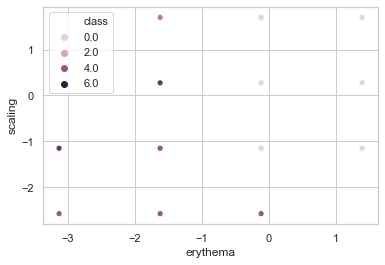

In [95]:
sns.scatterplot(X_scaled['erythema'],X_scaled['scaling'],hue=df['class'])

In [96]:
df.corr()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
erythema,1.000000,0.428913,0.248553,-0.032775,-0.008733,0.028079,-0.115390,-0.033552,0.138675,0.180637,...,0.153116,-0.004132,0.039621,-0.012570,-0.009075,0.006022,0.092819,-0.014022,-0.004635,-0.325124
scaling,0.428913,1.000000,0.349983,-0.073535,-0.008499,-0.074682,-0.098459,-0.084498,0.294055,0.296553,...,0.205574,-0.112811,0.021797,-0.117790,-0.014524,-0.015221,-0.007502,-0.134639,0.015097,-0.458324
definite borders,0.248553,0.349983,1.000000,-0.051813,0.237526,0.321831,-0.178948,0.279395,0.304414,0.259882,...,0.348977,0.290427,-0.245943,0.266296,-0.094818,-0.133532,0.119447,0.273899,0.145392,-0.385636
itching,-0.032775,-0.073535,-0.051813,1.000000,0.283927,0.415797,-0.143264,0.364791,-0.299320,-0.150710,...,-0.188967,0.374587,-0.004399,0.383274,-0.175680,-0.183976,0.056953,0.393242,0.043302,0.041880
koebner phenomenon,-0.008733,-0.008499,0.237526,0.283927,1.000000,0.387695,-0.176401,0.387423,-0.064746,0.012365,...,0.001517,0.371668,0.010356,0.376980,-0.150923,-0.167552,0.108140,0.376725,0.083798,-0.090646
polygonal papules,0.028079,-0.074682,0.321831,0.415797,0.387695,1.000000,-0.139835,0.863188,-0.278483,-0.259203,...,-0.123276,0.911542,0.093894,0.894709,-0.097430,-0.112365,0.257746,0.904050,0.098803,0.063844
follicular papules,-0.115390,-0.098459,-0.178948,-0.143264,-0.176401,-0.139835,1.000000,-0.134916,0.221237,-0.007808,...,-0.162027,-0.142797,-0.011169,-0.141949,0.784954,0.844695,-0.095097,-0.136796,-0.371177,0.488525
oral mucosal involvement,-0.033552,-0.084498,0.279395,0.364791,0.387423,0.863188,-0.134916,1.000000,-0.285815,-0.265582,...,-0.110448,0.886169,0.132848,0.873654,-0.084368,-0.108412,0.275158,0.890618,0.112871,0.061598
knee and elbow involvement,0.138675,0.294055,0.304414,-0.299320,-0.064746,-0.278483,0.221237,-0.285815,1.000000,0.660356,...,0.481475,-0.284820,-0.421838,-0.283021,0.232291,0.257138,-0.078093,-0.279370,-0.079756,-0.381958
scalp involvement,0.180637,0.296553,0.259882,-0.150710,0.012365,-0.259203,-0.007808,-0.265582,0.660356,1.000000,...,0.484803,-0.258688,-0.424626,-0.263418,-0.055503,-0.020856,0.025907,-0.256370,0.038505,-0.535954


In [97]:
df.cov()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),class
erythema,0.443269,0.200595,0.148656,-0.024730,-0.005288,0.017900,-0.044338,-0.018727,0.091540,0.109826,...,0.088951,-0.002644,0.029687,-0.008041,-0.002754,0.001983,0.043181,-0.010355,-0.047257,-0.345395
scaling,0.200595,0.493438,0.220848,-0.058540,-0.005429,-0.050231,-0.039916,-0.049759,0.204797,0.190232,...,0.126003,-0.076150,0.017232,-0.079501,-0.004650,-0.005288,-0.003682,-0.104900,0.162402,-0.513714
definite borders,0.148656,0.220848,0.806974,-0.052749,0.194033,0.276823,-0.092775,0.210407,0.271126,0.213192,...,0.273542,0.250708,-0.248639,0.229849,-0.038822,-0.059319,0.074977,0.272905,2.000118,-0.552765
itching,-0.024730,-0.058540,-0.052749,1.284361,0.292607,0.451201,-0.093704,0.346576,-0.336323,-0.155974,...,-0.186865,0.407941,-0.005610,0.417351,-0.090745,-0.103106,0.045101,0.494303,0.751511,0.075733
koebner phenomenon,-0.005288,-0.005429,0.194033,0.292607,0.826929,0.337574,-0.092579,0.295345,-0.058375,0.010268,...,0.001204,0.324780,0.010599,0.329383,-0.062553,-0.075347,0.068714,0.379969,1.166958,-0.131527
polygonal papules,0.017900,-0.050231,0.276823,0.451201,0.337574,0.916832,-0.077275,0.692884,-0.264375,-0.226647,...,-0.102996,0.838731,0.101179,0.823144,-0.042520,-0.053206,0.172450,0.960123,1.448777,0.097544
follicular papules,-0.044338,-0.039916,-0.092775,-0.093704,-0.092579,-0.077275,0.333082,-0.065276,0.126593,-0.004115,...,-0.081594,-0.079195,-0.007255,-0.078715,0.206480,0.241077,-0.038350,-0.087566,-3.280521,0.449879
oral mucosal involvement,-0.018727,-0.049759,0.210407,0.346576,0.295345,0.692884,-0.065276,0.702782,-0.237560,-0.203317,...,-0.080792,0.713884,0.125334,0.703719,-0.032236,-0.044944,0.161182,0.828117,1.449037,0.082397
knee and elbow involvement,0.091540,0.204797,0.271126,-0.336323,-0.058375,-0.264375,0.126593,-0.237560,0.983004,0.597890,...,0.416533,-0.271362,-0.470683,-0.269616,0.104971,0.126074,-0.054103,-0.307218,-1.210957,-0.604263
scalp involvement,0.109826,0.190232,0.213192,-0.155974,0.010268,-0.226647,-0.004115,-0.203317,0.597890,0.833931,...,0.386303,-0.227009,-0.436393,-0.231132,-0.023101,-0.009418,0.016531,-0.259670,0.538476,-0.780954


In [98]:
#Outlier treatment
for col in df.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

C:\Users\SUDHA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SUDHA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SUDHA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

C:\Users\SUDHA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SUDHA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SUDHA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

##### 4.	Clustering: Use PCA dimensions to cluster the data. Apply K-means and Agglomerative clustering. 
(30 Marks)
Some pointers which would help you, but don’t be limited by these
a.	Find the optimal K Value. (3 marks)
b.	Apply Clustering and visualize the spread of data (20 marks)
c.	Evaluate the clusters formed using appropriate metrics (inertia, silhouette score) to support the model built and compare both the models. (5 marks)
d.	Using best attributes based on the relationship between them, plot the clusters. (2 marks)


In [99]:
X_scaled

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
0,1.386127,1.701117,1.589384,0.574229,0.397921,-0.471652,-0.296480,-0.455061,0.381942,0.512970,...,-0.467825,-0.546502,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,-1.846903
1,-0.117968,-1.150051,0.474629,1.457849,0.397921,2.665861,-0.296480,3.128543,-0.628082,-0.583619,...,1.868029,-0.546502,1.602553,1.829497,1.605663,-0.233865,-0.238237,0.172617,2.202770,-0.669853
2,-0.117968,0.275533,0.474629,-1.193011,-0.703302,-0.471652,-0.296480,-0.455061,2.401988,1.609560,...,-0.467825,2.896462,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,1.605740,-0.505803,0.245631
3,-0.117968,1.701117,0.474629,0.574229,1.499143,1.620023,-0.296480,1.934008,-0.628082,-0.583619,...,1.868029,1.748807,2.644650,0.939673,2.647885,-0.233865,-0.238237,0.172617,2.202770,0.572589
4,-0.117968,1.701117,0.474629,-1.193011,-0.703302,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,0.939673,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,0.311023
5,-0.117968,-1.150051,-1.754880,0.574229,-0.703302,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,0.172617,-0.505803,-1.192986
6,-0.117968,0.275533,1.589384,1.457849,2.600366,2.665861,-0.296480,1.934008,-0.628082,-0.583619,...,-0.467825,1.748807,1.602553,1.829497,1.605663,-0.233865,-0.238237,1.605740,2.202770,1.357290
7,-0.117968,0.275533,-0.640125,-1.193011,1.499143,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,0.939673,-0.478780,-0.233865,-0.238237,0.172617,-0.505803,-0.931420
8,-0.117968,0.275533,-0.640125,-1.193011,0.397921,-0.471652,-0.296480,-0.455061,-0.628082,-0.583619,...,-0.467825,-0.546502,-0.481641,0.939673,-0.478780,-0.233865,-0.238237,0.172617,-0.505803,-0.408286
9,1.386127,1.701117,0.474629,-0.309391,0.397921,-0.471652,-0.296480,-0.455061,1.391965,1.609560,...,-0.467825,-0.546502,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,-1.062203


In [100]:
from sklearn.cluster import KMeans

# kmeans clustering  in an iteration 1 till 20 cluster size
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(7)

,num_clusters,cluster_errors
0,1,12138.000000
1,2,9337.168047
2,3,7266.243992
3,4,6270.494278
4,5,5651.834582
5,6,5428.327126
6,7,5224.020845


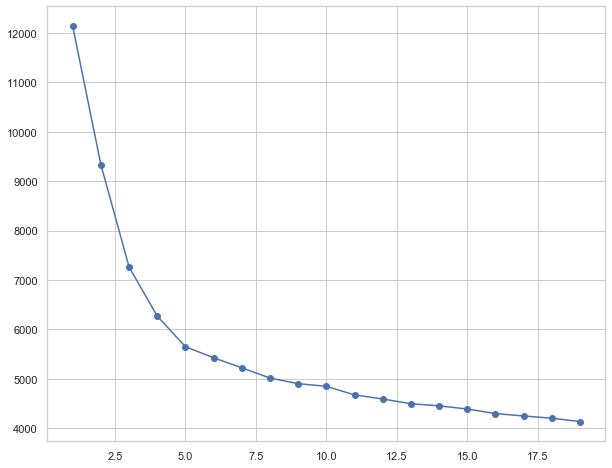

In [101]:
plt.figure(figsize=(10,8))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

The elbow plot show only 5 clusters. Let us see the clusters using hierarchical and compare.

In [102]:
# Inference : per the elbow, the cluster size is 5
kmeans = KMeans(n_clusters=5,init = 'k-means++',random_state=100).fit(X_scaled)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [103]:
#centroids and labels

centroids = kmeans.cluster_centers_
print(centroids)

print('\n')

label = kmeans.labels_
print(label)

[[ 9.13838326e-03 -2.46511847e-01  5.84534708e-01  8.10690986e-01
   7.70165043e-01  1.89989498e+00 -2.96480027e-01  1.83306176e+00
  -5.99630324e-01 -5.52729066e-01 -3.74933434e-01  1.89165967e+00
   6.29112361e-02 -6.74691800e-01 -3.13930373e-01  8.15039171e-01
   2.44865252e-01 -3.06077496e-01 -1.02397207e-01 -6.25868157e-01
  -8.51280229e-01 -6.19727759e-01 -4.43658880e-01 -4.27822967e-01
   1.86802910e+00 -2.71711720e-01  1.92545591e+00  1.50111847e-01
   1.91392586e+00 -2.02919906e-01 -2.38236766e-01  5.76313489e-01
   1.94844421e+00  2.42867965e-01]
 [-4.27634798e-02 -8.08629725e-02 -5.84387376e-01 -7.51200805e-01
  -7.03301840e-01 -4.71652250e-01  3.52082183e+00 -4.55060787e-01
   1.08895784e+00 -3.53243020e-02  1.14610334e+00 -4.69607820e-01
  -3.43592135e-01 -4.90356362e-01 -3.81904986e-01  1.22558401e-01
  -4.35535275e-01  3.80941761e-01 -4.49436189e-02 -5.31591815e-01
  -7.64943001e-01 -6.19727759e-01 -3.69646627e-01 -4.83020943e-01
  -4.09428795e-01 -5.46502326e-01 -4.8164

##### 5.	Use the cluster labels from the best method above and interpret the clusters formed. (5 marks)

## Hierarchical clustering

In [104]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 364
Data columns (total 35 columns):
erythema                                    357 non-null float64
scaling                                     357 non-null int64
definite borders                            357 non-null int64
itching                                     357 non-null int64
koebner phenomenon                          357 non-null int64
polygonal papules                           357 non-null int64
follicular papules                          357 non-null int64
oral mucosal involvement                    357 non-null int64
knee and elbow involvement                  357 non-null int64
scalp involvement                           357 non-null int64
family history, (0 or 1)                    357 non-null int64
melanin incontinence                        357 non-null int64
eosinophils in the infiltrate               357 non-null int64
PNL infiltrate                              357 non-null int64
fibrosis of

In [106]:
# generate the linkage matrix
Z = linkage(X_scaled, 'ward')
print(Z)

[[ 14.          62.           1.24244223   2.        ]
 [ 92.          96.           1.43405242   2.        ]
 [  9.          58.           1.43861732   2.        ]
 ...
 [696.         709.          44.60641018 176.        ]
 [707.         710.          64.37946282 287.        ]
 [702.         711.          74.81083799 357.        ]]


### Dendrogram

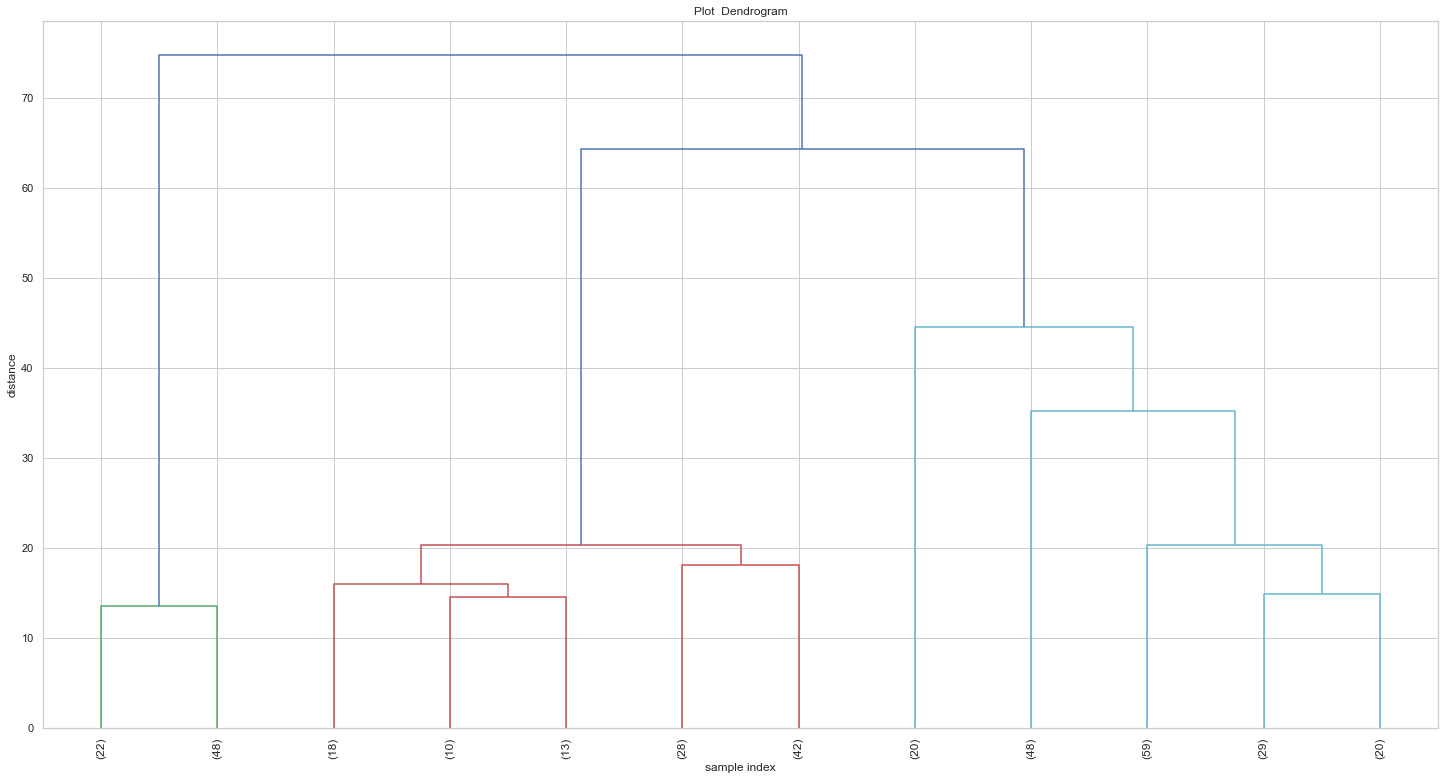

In [107]:
plt.figure(figsize=(25, 13))
plt.title('Plot  Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90,leaf_font_size=12, truncate_mode='lastp',  # show only the last p merged clusters
    p=12  )
plt.show()

As expected, the dendrogram shows lot of overlapping clusters. This makes sense that the given the no. of classes is 6 and the kmeans shows 5 clusters. Hence, hierarchical clustering is the best choice for the same when we look at the dendrogram. 

## Agglomerative clustering

In [108]:
## call the library
from sklearn.cluster import AgglomerativeClustering


In [109]:
# Hierarchical AgglomerativeClustering by default method
clustering = AgglomerativeClustering(n_clusters=6).fit(X_scaled)
clustering 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [110]:
label = clustering.labels_
label

array([0, 1, 0, 1, 2, 4, 1, 5, 5, 0, 2, 2, 0, 1, 5, 2, 0, 1, 4, 3, 2, 4,
       1, 4, 0, 3, 4, 5, 1, 0, 2, 0, 2, 1, 0, 5, 5, 0, 5, 4, 1, 5, 3, 5,
       1, 1, 5, 0, 0, 4, 0, 2, 1, 5, 2, 3, 0, 4, 0, 2, 1, 0, 5, 4, 0, 5,
       3, 1, 4, 5, 2, 2, 0, 1, 4, 0, 2, 2, 2, 4, 0, 0, 1, 0, 5, 2, 2, 4,
       0, 1, 5, 2, 4, 0, 3, 2, 4, 0, 2, 2, 0, 5, 0, 1, 0, 0, 1, 4, 1, 1,
       4, 2, 1, 5, 0, 2, 4, 3, 0, 0, 2, 3, 1, 4, 5, 0, 0, 1, 4, 4, 0, 5,
       2, 1, 0, 2, 0, 0, 5, 1, 1, 2, 4, 5, 2, 2, 0, 0, 0, 4, 1, 2, 1, 5,
       5, 5, 5, 1, 3, 2, 0, 0, 1, 5, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 3, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 5, 2, 5, 5, 5, 5, 3, 3, 3, 5, 5, 5, 0,
       0, 0, 0, 0, 5, 2, 5, 5, 5, 0, 0, 5, 5, 5, 1, 1, 1, 1, 0, 0, 0, 0,
       4, 4, 4, 4, 4, 1, 1, 1, 5, 0, 0, 5, 5, 5, 0,

## Add the Target variable

In [111]:
df_new = pd.concat([X_scaled,pd.Series(label,name = "target")],axis =1)
df_new.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),target
0,1.386127,1.701117,1.589384,0.574229,0.397921,-0.471652,-0.29648,-0.455061,0.381942,0.512970,...,-0.546502,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,-1.846903,0
1,-0.117968,-1.150051,0.474629,1.457849,0.397921,2.665861,-0.29648,3.128543,-0.628082,-0.583619,...,-0.546502,1.602553,1.829497,1.605663,-0.233865,-0.238237,0.172617,2.202770,-0.669853,1
2,-0.117968,0.275533,0.474629,-1.193011,-0.703302,-0.471652,-0.29648,-0.455061,2.401988,1.609560,...,2.896462,-0.481641,-0.839973,-0.478780,-0.233865,-0.238237,1.605740,-0.505803,0.245631,0
3,-0.117968,1.701117,0.474629,0.574229,1.499143,1.620023,-0.29648,1.934008,-0.628082,-0.583619,...,1.748807,2.644650,0.939673,2.647885,-0.233865,-0.238237,0.172617,2.202770,0.572589,1
4,-0.117968,1.701117,0.474629,-1.193011,-0.703302,-0.471652,-0.29648,-0.455061,-0.628082,-0.583619,...,-0.546502,-0.481641,0.939673,-0.478780,-0.233865,-0.238237,-1.260506,-0.505803,0.311023,2


In [112]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 35 columns):
erythema                                    357 non-null float64
scaling                                     357 non-null float64
definite borders                            357 non-null float64
itching                                     357 non-null float64
koebner phenomenon                          357 non-null float64
polygonal papules                           357 non-null float64
follicular papules                          357 non-null float64
oral mucosal involvement                    357 non-null float64
knee and elbow involvement                  357 non-null float64
scalp involvement                           357 non-null float64
family history, (0 or 1)                    357 non-null float64
melanin incontinence                        357 non-null float64
eosinophils in the infiltrate               357 non-null float64
PNL infiltrate                              357 no

In [113]:
df_new['target'].value_counts()

0    111
1     70
5     59
2     49
4     48
3     20
Name: target, dtype: int64

In [114]:
df['class'].value_counts()

1    111
3     71
2     59
5     48
4     48
6     20
Name: class, dtype: int64

##### 6.	Summarize as follows (10 marks)
a.	Summarize the overall fit of the model. Compare all the clustering models built and list down the measures to prove that it is a good model.
b.	Write down a business interpretation/explanation of the model. (List the countries to be focused on).
c.	What are the key risks to your results and interpretation?


So, from the above we can conclude that our agglomerative clustering has done a pretty good job of clustering almost all the classes except for 1 misclassification of class 3 and 1 misclassification of class 5. Both are interchanged.

class 1 = class 0, 
class 2 = class 5,
class 3 = class 1
class 4 = class 4
class 5 = class 2
class 6 = class 3

So the total accuracy is 355/357)